## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  85.358188  1411.299803  0.060696  6.048624  0.796242
1  45.884289  1205.613926  0.797539  6.641087  1.368794
2  75.522431  1682.628068  0.886015  8.337313  1.364110
3  88.820873  1519.014334  0.672718  9.040457  1.704663
4  39.277122  1647.004230  0.853837  7.551027  1.614975


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0561339	total: 56ms	remaining: 55.9s
1:	learn: 1.0463374	total: 56.9ms	remaining: 28.4s
2:	learn: 1.0341965	total: 57.8ms	remaining: 19.2s
3:	learn: 1.0234663	total: 58.3ms	remaining: 14.5s
4:	learn: 1.0140509	total: 59.4ms	remaining: 11.8s
5:	learn: 1.0051241	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9973151	total: 61.6ms	remaining: 8.74s
7:	learn: 0.9876379	total: 62.1ms	remaining: 7.71s
8:	learn: 0.9779161	total: 62.6ms	remaining: 6.9s
9:	learn: 0.9692362	total: 65.5ms	remaining: 6.49s
10:	learn: 0.9607586	total: 66ms	remaining: 5.93s
11:	learn: 0.9514894	total: 66.5ms	remaining: 5.47s
12:	learn: 0.9443585	total: 66.9ms	remaining: 5.08s
13:	learn: 0.9344342	total: 67.5ms	remaining: 4.75s
14:	learn: 0.9255799	total: 68ms	remaining: 4.46s
15:	learn: 0.9170472	total: 69.5ms	remaining: 4.28s
16:	learn: 0.9099124	total: 70.6ms	remaining: 4.08s
17:	learn: 0.9030814	total: 71.7ms	remaining: 3.91s
18:	learn: 0.8975100	total: 72.6ms	remaining: 3.75s
19:	learn: 0.8894311	total: 7

126:	learn: 0.4219508	total: 161ms	remaining: 1.11s
127:	learn: 0.4197706	total: 163ms	remaining: 1.11s
128:	learn: 0.4166172	total: 163ms	remaining: 1.1s
129:	learn: 0.4142490	total: 164ms	remaining: 1.1s
130:	learn: 0.4119503	total: 165ms	remaining: 1.09s
131:	learn: 0.4097210	total: 166ms	remaining: 1.09s
132:	learn: 0.4068450	total: 166ms	remaining: 1.08s
133:	learn: 0.4044964	total: 167ms	remaining: 1.08s
134:	learn: 0.4026679	total: 168ms	remaining: 1.07s
135:	learn: 0.4000071	total: 168ms	remaining: 1.07s
136:	learn: 0.3979661	total: 169ms	remaining: 1.06s
137:	learn: 0.3962341	total: 170ms	remaining: 1.06s
138:	learn: 0.3947867	total: 171ms	remaining: 1.06s
139:	learn: 0.3928145	total: 171ms	remaining: 1.05s
140:	learn: 0.3908131	total: 172ms	remaining: 1.05s
141:	learn: 0.3888072	total: 172ms	remaining: 1.04s
142:	learn: 0.3864804	total: 173ms	remaining: 1.04s
143:	learn: 0.3840931	total: 174ms	remaining: 1.03s
144:	learn: 0.3821015	total: 174ms	remaining: 1.03s
145:	learn: 0.

192:	learn: 0.3106585	total: 206ms	remaining: 863ms
193:	learn: 0.3093201	total: 207ms	remaining: 861ms
194:	learn: 0.3083079	total: 208ms	remaining: 860ms
195:	learn: 0.3069593	total: 209ms	remaining: 858ms
196:	learn: 0.3058785	total: 210ms	remaining: 855ms
197:	learn: 0.3045147	total: 210ms	remaining: 851ms
198:	learn: 0.3038133	total: 211ms	remaining: 848ms
199:	learn: 0.3027887	total: 211ms	remaining: 846ms
200:	learn: 0.3015432	total: 212ms	remaining: 844ms
201:	learn: 0.3002477	total: 213ms	remaining: 841ms
202:	learn: 0.2995085	total: 213ms	remaining: 838ms
203:	learn: 0.2983267	total: 214ms	remaining: 836ms
204:	learn: 0.2976012	total: 215ms	remaining: 833ms
205:	learn: 0.2961654	total: 216ms	remaining: 831ms
206:	learn: 0.2951015	total: 216ms	remaining: 829ms
207:	learn: 0.2942344	total: 217ms	remaining: 827ms
208:	learn: 0.2932406	total: 218ms	remaining: 824ms
209:	learn: 0.2919747	total: 219ms	remaining: 822ms
210:	learn: 0.2907543	total: 219ms	remaining: 820ms
211:	learn: 

305:	learn: 0.2197338	total: 314ms	remaining: 713ms
306:	learn: 0.2190867	total: 315ms	remaining: 712ms
307:	learn: 0.2181551	total: 316ms	remaining: 711ms
308:	learn: 0.2173818	total: 317ms	remaining: 709ms
309:	learn: 0.2171071	total: 318ms	remaining: 707ms
310:	learn: 0.2164182	total: 318ms	remaining: 705ms
311:	learn: 0.2159421	total: 319ms	remaining: 704ms
312:	learn: 0.2152820	total: 320ms	remaining: 702ms
313:	learn: 0.2148389	total: 321ms	remaining: 700ms
314:	learn: 0.2139579	total: 321ms	remaining: 698ms
315:	learn: 0.2131317	total: 322ms	remaining: 697ms
316:	learn: 0.2128728	total: 322ms	remaining: 695ms
317:	learn: 0.2122464	total: 323ms	remaining: 693ms
318:	learn: 0.2119997	total: 326ms	remaining: 695ms
319:	learn: 0.2115694	total: 327ms	remaining: 696ms
320:	learn: 0.2107860	total: 329ms	remaining: 695ms
321:	learn: 0.2100021	total: 330ms	remaining: 695ms
322:	learn: 0.2097814	total: 332ms	remaining: 696ms
323:	learn: 0.2094308	total: 333ms	remaining: 695ms
324:	learn: 

362:	learn: 0.1803254	total: 360ms	remaining: 633ms
363:	learn: 0.1799499	total: 362ms	remaining: 632ms
364:	learn: 0.1795813	total: 362ms	remaining: 630ms
365:	learn: 0.1789352	total: 364ms	remaining: 630ms
366:	learn: 0.1780426	total: 365ms	remaining: 629ms
367:	learn: 0.1776852	total: 366ms	remaining: 629ms
368:	learn: 0.1773343	total: 367ms	remaining: 627ms
369:	learn: 0.1769899	total: 368ms	remaining: 627ms
370:	learn: 0.1761542	total: 369ms	remaining: 626ms
371:	learn: 0.1758176	total: 371ms	remaining: 626ms
372:	learn: 0.1754871	total: 371ms	remaining: 624ms
373:	learn: 0.1749114	total: 374ms	remaining: 626ms
374:	learn: 0.1745881	total: 375ms	remaining: 626ms
375:	learn: 0.1740284	total: 377ms	remaining: 626ms
376:	learn: 0.1733901	total: 379ms	remaining: 626ms
377:	learn: 0.1728472	total: 379ms	remaining: 624ms
378:	learn: 0.1723188	total: 380ms	remaining: 623ms
379:	learn: 0.1717029	total: 381ms	remaining: 621ms
380:	learn: 0.1709066	total: 382ms	remaining: 620ms
381:	learn: 

486:	learn: 0.1145912	total: 463ms	remaining: 488ms
487:	learn: 0.1141622	total: 465ms	remaining: 487ms
488:	learn: 0.1136237	total: 466ms	remaining: 487ms
489:	learn: 0.1133401	total: 467ms	remaining: 486ms
490:	learn: 0.1129915	total: 467ms	remaining: 484ms
491:	learn: 0.1125056	total: 468ms	remaining: 483ms
492:	learn: 0.1122307	total: 469ms	remaining: 482ms
493:	learn: 0.1117074	total: 469ms	remaining: 481ms
494:	learn: 0.1113912	total: 470ms	remaining: 479ms
495:	learn: 0.1109213	total: 471ms	remaining: 478ms
496:	learn: 0.1106559	total: 474ms	remaining: 479ms
497:	learn: 0.1102472	total: 475ms	remaining: 479ms
498:	learn: 0.1099139	total: 476ms	remaining: 478ms
499:	learn: 0.1094579	total: 477ms	remaining: 477ms
500:	learn: 0.1090531	total: 479ms	remaining: 477ms
501:	learn: 0.1087379	total: 480ms	remaining: 476ms
502:	learn: 0.1083370	total: 480ms	remaining: 475ms
503:	learn: 0.1079420	total: 481ms	remaining: 474ms
504:	learn: 0.1075948	total: 482ms	remaining: 473ms
505:	learn: 

526:	learn: 0.0994650	total: 509ms	remaining: 457ms
527:	learn: 0.0991859	total: 510ms	remaining: 456ms
528:	learn: 0.0989621	total: 512ms	remaining: 456ms
529:	learn: 0.0987008	total: 515ms	remaining: 457ms
530:	learn: 0.0982008	total: 516ms	remaining: 456ms
531:	learn: 0.0980510	total: 517ms	remaining: 455ms
532:	learn: 0.0978343	total: 518ms	remaining: 454ms
533:	learn: 0.0976867	total: 518ms	remaining: 452ms
534:	learn: 0.0974365	total: 519ms	remaining: 451ms
535:	learn: 0.0972147	total: 519ms	remaining: 449ms
536:	learn: 0.0970713	total: 520ms	remaining: 448ms
537:	learn: 0.0968187	total: 521ms	remaining: 447ms
538:	learn: 0.0966015	total: 522ms	remaining: 446ms
539:	learn: 0.0964601	total: 522ms	remaining: 445ms
540:	learn: 0.0962132	total: 523ms	remaining: 444ms
541:	learn: 0.0958193	total: 523ms	remaining: 442ms
542:	learn: 0.0953407	total: 524ms	remaining: 441ms
543:	learn: 0.0951010	total: 525ms	remaining: 440ms
544:	learn: 0.0948876	total: 525ms	remaining: 439ms
545:	learn: 

635:	learn: 0.0767429	total: 600ms	remaining: 343ms
636:	learn: 0.0765120	total: 601ms	remaining: 342ms
637:	learn: 0.0764198	total: 602ms	remaining: 341ms
638:	learn: 0.0762808	total: 603ms	remaining: 340ms
639:	learn: 0.0761079	total: 603ms	remaining: 339ms
640:	learn: 0.0760169	total: 604ms	remaining: 338ms
641:	learn: 0.0757901	total: 605ms	remaining: 337ms
642:	learn: 0.0756987	total: 606ms	remaining: 336ms
643:	learn: 0.0755626	total: 607ms	remaining: 336ms
644:	learn: 0.0753935	total: 608ms	remaining: 335ms
645:	learn: 0.0752874	total: 609ms	remaining: 334ms
646:	learn: 0.0750650	total: 610ms	remaining: 333ms
647:	learn: 0.0749752	total: 611ms	remaining: 332ms
648:	learn: 0.0748418	total: 612ms	remaining: 331ms
649:	learn: 0.0747280	total: 613ms	remaining: 330ms
650:	learn: 0.0745628	total: 614ms	remaining: 329ms
651:	learn: 0.0744326	total: 620ms	remaining: 331ms
652:	learn: 0.0742708	total: 621ms	remaining: 330ms
653:	learn: 0.0740527	total: 621ms	remaining: 329ms
654:	learn: 

695:	learn: 0.0669387	total: 652ms	remaining: 285ms
696:	learn: 0.0666461	total: 653ms	remaining: 284ms
697:	learn: 0.0663610	total: 656ms	remaining: 284ms
698:	learn: 0.0660295	total: 656ms	remaining: 283ms
699:	learn: 0.0658683	total: 658ms	remaining: 282ms
700:	learn: 0.0655812	total: 659ms	remaining: 281ms
701:	learn: 0.0654241	total: 662ms	remaining: 281ms
702:	learn: 0.0651513	total: 663ms	remaining: 280ms
703:	learn: 0.0648855	total: 664ms	remaining: 279ms
704:	learn: 0.0646101	total: 665ms	remaining: 278ms
705:	learn: 0.0643413	total: 665ms	remaining: 277ms
706:	learn: 0.0642556	total: 666ms	remaining: 276ms
707:	learn: 0.0641714	total: 667ms	remaining: 275ms
708:	learn: 0.0640192	total: 668ms	remaining: 274ms
709:	learn: 0.0639362	total: 668ms	remaining: 273ms
710:	learn: 0.0638546	total: 669ms	remaining: 272ms
711:	learn: 0.0636351	total: 669ms	remaining: 271ms
712:	learn: 0.0634877	total: 670ms	remaining: 270ms
713:	learn: 0.0632755	total: 671ms	remaining: 269ms
714:	learn: 

760:	learn: 0.0553046	total: 809ms	remaining: 254ms
761:	learn: 0.0552385	total: 812ms	remaining: 253ms


762:	learn: 0.0551599	total: 813ms	remaining: 253ms
763:	learn: 0.0549072	total: 814ms	remaining: 252ms
764:	learn: 0.0547746	total: 815ms	remaining: 250ms
765:	learn: 0.0546851	total: 817ms	remaining: 249ms
766:	learn: 0.0546209	total: 818ms	remaining: 249ms
767:	learn: 0.0545010	total: 820ms	remaining: 248ms
768:	learn: 0.0542510	total: 821ms	remaining: 247ms
769:	learn: 0.0541640	total: 821ms	remaining: 245ms
770:	learn: 0.0541023	total: 822ms	remaining: 244ms
771:	learn: 0.0540264	total: 823ms	remaining: 243ms
772:	learn: 0.0539010	total: 823ms	remaining: 242ms
773:	learn: 0.0536018	total: 824ms	remaining: 241ms
774:	learn: 0.0535415	total: 825ms	remaining: 239ms
775:	learn: 0.0534676	total: 825ms	remaining: 238ms
776:	learn: 0.0534080	total: 826ms	remaining: 237ms
777:	learn: 0.0533241	total: 827ms	remaining: 236ms
778:	learn: 0.0532120	total: 827ms	remaining: 235ms
779:	learn: 0.0529842	total: 828ms	remaining: 233ms
780:	learn: 0.0528287	total: 829ms	remaining: 232ms
781:	learn: 

951:	learn: 0.0332793	total: 970ms	remaining: 48.9ms
952:	learn: 0.0332443	total: 972ms	remaining: 47.9ms
953:	learn: 0.0332098	total: 973ms	remaining: 46.9ms


954:	learn: 0.0330691	total: 974ms	remaining: 45.9ms
955:	learn: 0.0330142	total: 975ms	remaining: 44.9ms
956:	learn: 0.0328250	total: 976ms	remaining: 43.9ms
957:	learn: 0.0327843	total: 977ms	remaining: 42.8ms
958:	learn: 0.0327442	total: 978ms	remaining: 41.8ms
959:	learn: 0.0326679	total: 980ms	remaining: 40.8ms
960:	learn: 0.0326143	total: 981ms	remaining: 39.8ms
961:	learn: 0.0325395	total: 983ms	remaining: 38.8ms
962:	learn: 0.0324204	total: 984ms	remaining: 37.8ms
963:	learn: 0.0323810	total: 985ms	remaining: 36.8ms
964:	learn: 0.0323076	total: 985ms	remaining: 35.7ms
965:	learn: 0.0321949	total: 988ms	remaining: 34.8ms
966:	learn: 0.0321230	total: 989ms	remaining: 33.7ms
967:	learn: 0.0319912	total: 990ms	remaining: 32.7ms
968:	learn: 0.0318923	total: 990ms	remaining: 31.7ms
969:	learn: 0.0317773	total: 991ms	remaining: 30.6ms
970:	learn: 0.0316906	total: 992ms	remaining: 29.6ms
971:	learn: 0.0315622	total: 992ms	remaining: 28.6ms
972:	learn: 0.0314309	total: 993ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.28639841150630374


ABC Pre-generator MAE 1.1494561555706988


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

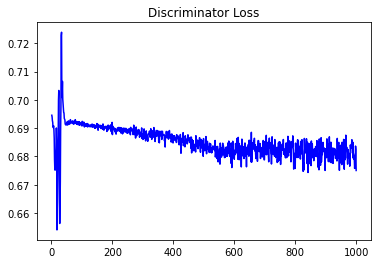

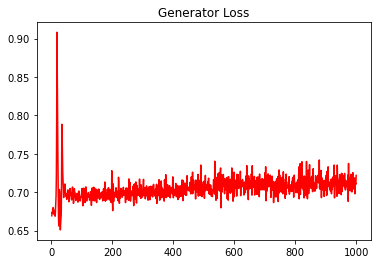

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4274612400960177


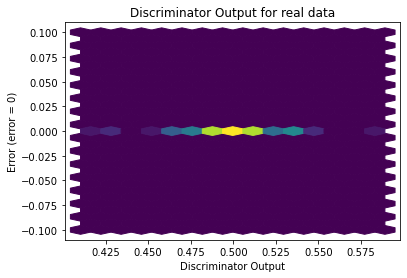

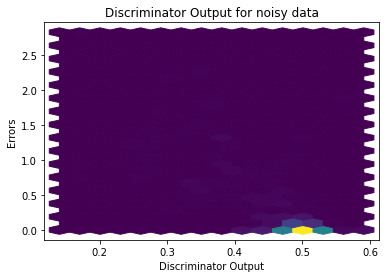

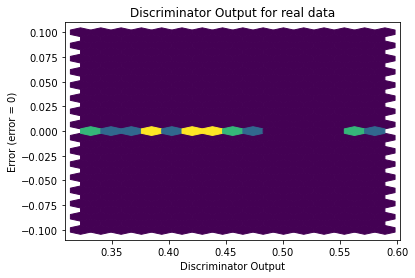

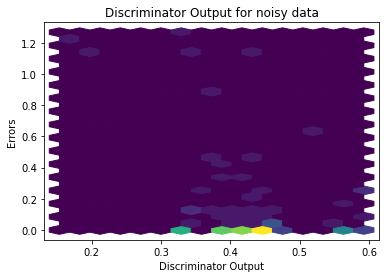

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

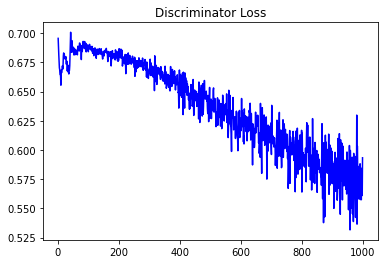

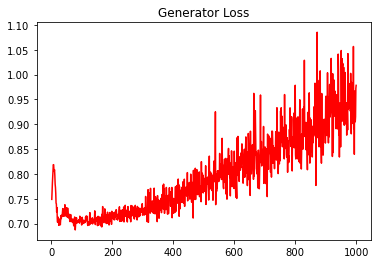

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.42266668685525655


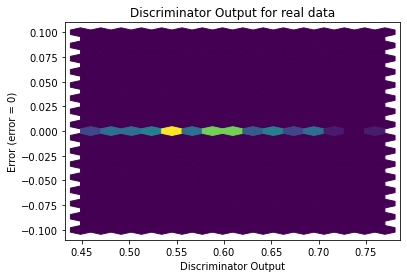

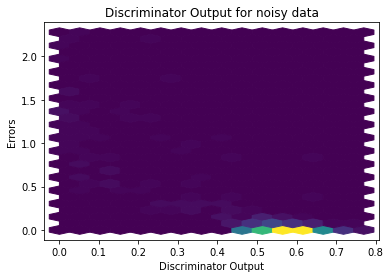

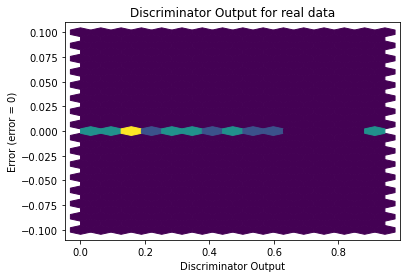

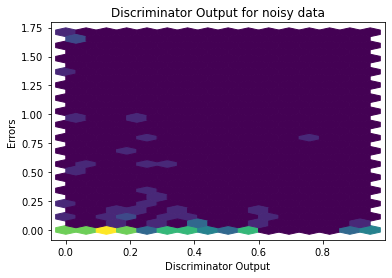

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


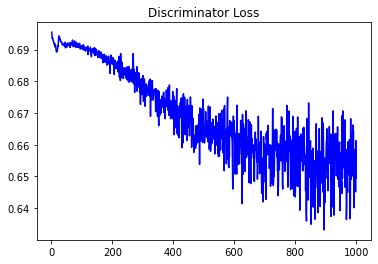

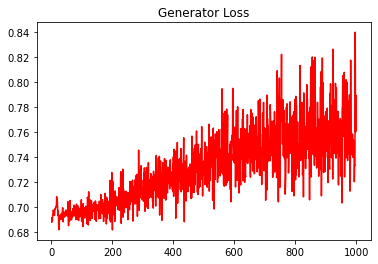

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.3835936693660915


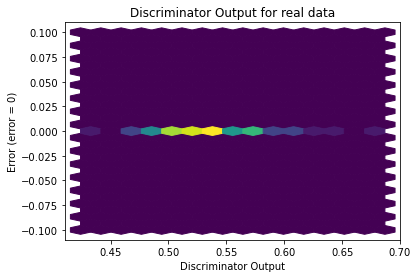

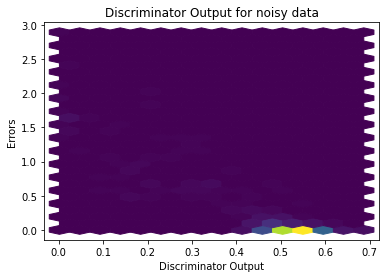

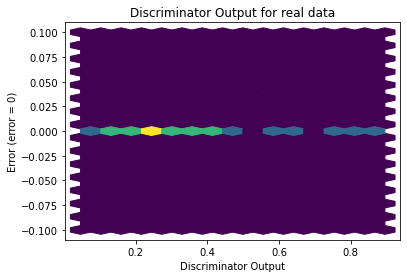

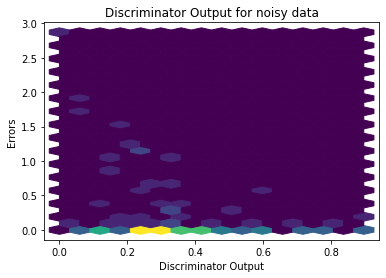

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


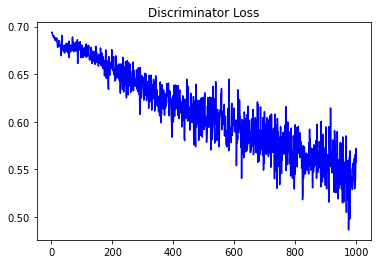

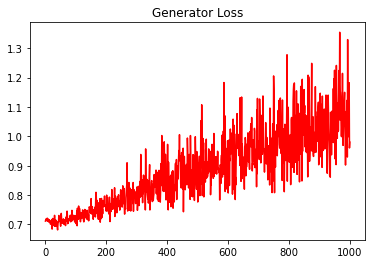

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.490264230162371


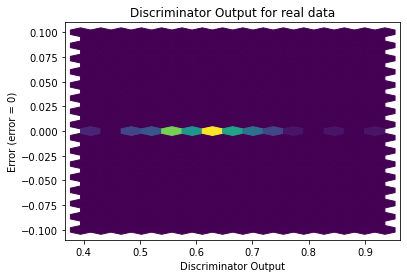

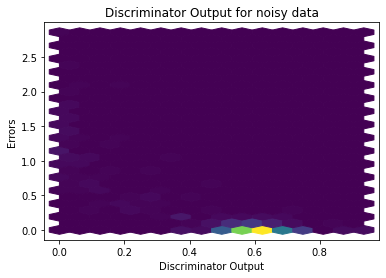

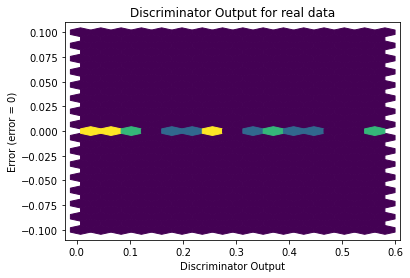

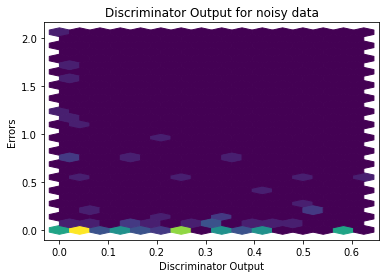

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1870]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4645]], requires_grad=True)
